# **Exploratory Data Analysis**

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df = pd.read_csv('/workspaces/Laptop_Price_Predictor/data/raw/laptop_data.csv')

In [136]:
df.shape

(3976, 18)

In [137]:
df.columns

Index(['Unnamed: 0', 'Brand', 'Name', 'Price', 'Processor_Name',
       'Processor_Brand', 'RAM_Expandable', 'RAM', 'RAM_TYPE', 'Ghz',
       'Display_type', 'Display', 'GPU', 'GPU_Brand', 'SSD', 'HDD', 'Adapter',
       'Battery_Life'],
      dtype='object')

In [138]:
df.head()


,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976 entries, 0 to 3975
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3976 non-null   int64 
 1   Brand            3976 non-null   object
 2   Name             3976 non-null   object
 3   Price            3976 non-null   int64 
 4   Processor_Name   3976 non-null   object
 5   Processor_Brand  3976 non-null   object
 6   RAM_Expandable   3976 non-null   object
 7   RAM              3976 non-null   object
 8   RAM_TYPE         3976 non-null   object
 9   Ghz              3976 non-null   object
 10  Display_type     3976 non-null   object
 11  Display          3976 non-null   object
 12  GPU              3968 non-null   object
 13  GPU_Brand        3972 non-null   object
 14  SSD              3976 non-null   object
 15  HDD              3976 non-null   object
 16  Adapter          3976 non-null   object
 17  Battery_Life     3558 non-null   

In [140]:
print("Null value counts\n")
df.isnull().sum()

Null value counts



Unnamed: 0           0
Brand                0
Name                 0
Price                0
Processor_Name       0
Processor_Brand      0
RAM_Expandable       0
RAM                  0
RAM_TYPE             0
Ghz                  0
Display_type         0
Display              0
GPU                  8
GPU_Brand            4
SSD                  0
HDD                  0
Adapter              0
Battery_Life       418
dtype: int64

In [141]:
df = df.drop(['Unnamed: 0', 'Name'], axis=1)

In [142]:
print(f"Duplicated rows count: {df.duplicated().sum()}")
df = df.drop_duplicates() #Remove duplicates columns

Duplicated rows count: 27


In [143]:
df.describe(include='all')

,Brand,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
count,3949,3949.000000,3949,3949,3949,3949,3949,3949,3949,3949,3941,3945,3949,3949,3949,3531
unique,31,NaN,125,19,10,20,19,31,2,34,300,11,19,8,68,191
top,ASUS,NaN,Intel Core i5 (11th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,65,65W Adapter
freq,976,NaN,316,2986,2141,1601,1495,330,2016,2189,644,1922,1915,2993,1451,799
mean,NaN,72437.915422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,52285.617467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,7990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,39853.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,58990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,84990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
df.dtypes #Explain data types

Brand              object
Price               int64
Processor_Name     object
Processor_Brand    object
RAM_Expandable     object
RAM                object
RAM_TYPE           object
Ghz                object
Display_type       object
Display            object
GPU                object
GPU_Brand          object
SSD                object
HDD                object
Adapter            object
Battery_Life       object
dtype: object

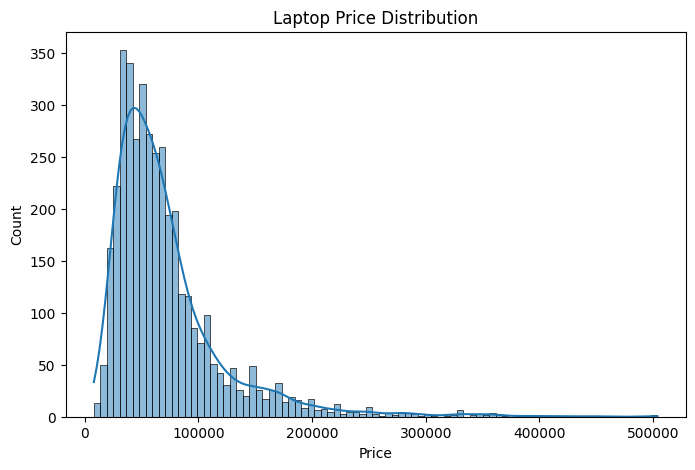

In [145]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], kde=True)
plt.title('Laptop Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

#####  **Visualization of each column**

*1. Visualization of Brand*

Number of unique Brands: 31

Unique Values: ['HP' 'Lenovo' 'Dell' 'Infinix' 'Acer' 'ASUS' 'Tecno' 'Xiaomi' 'MSI'
 'Samsung' 'Apple' 'Realme' 'AVITA' 'Zebronics' 'Honor' 'Fujitsu' 'Wings'
 'LG' 'Gigabyte' 'Microsoft' 'Razer' 'Coconics' 'Huawei' 'Micromax'
 'iball' 'Lava' 'VAIO' 'Smartron' 'Colorful' 'Nokia' 'RDP']

Value count for each unique Brand type: Brand
ASUS         976
Lenovo       808
HP           799
Dell         420
Acer         317
MSI          316
Samsung       61
Apple         48
Infinix       39
Microsoft     33
AVITA         23
Gigabyte      17
LG            15
Honor         14
iball         11
Xiaomi        10
Fujitsu        8
Zebronics      8
Wings          4
Colorful       3
Realme         3
Micromax       3
Coconics       3
Tecno          2
Smartron       2
Huawei         1
Razer          1
VAIO           1
Lava           1
Nokia          1
RDP            1
Name: count, dtype: int64


/tmp/ipykernel_1688/2657073020.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Brand',data=df, palette='Set2')


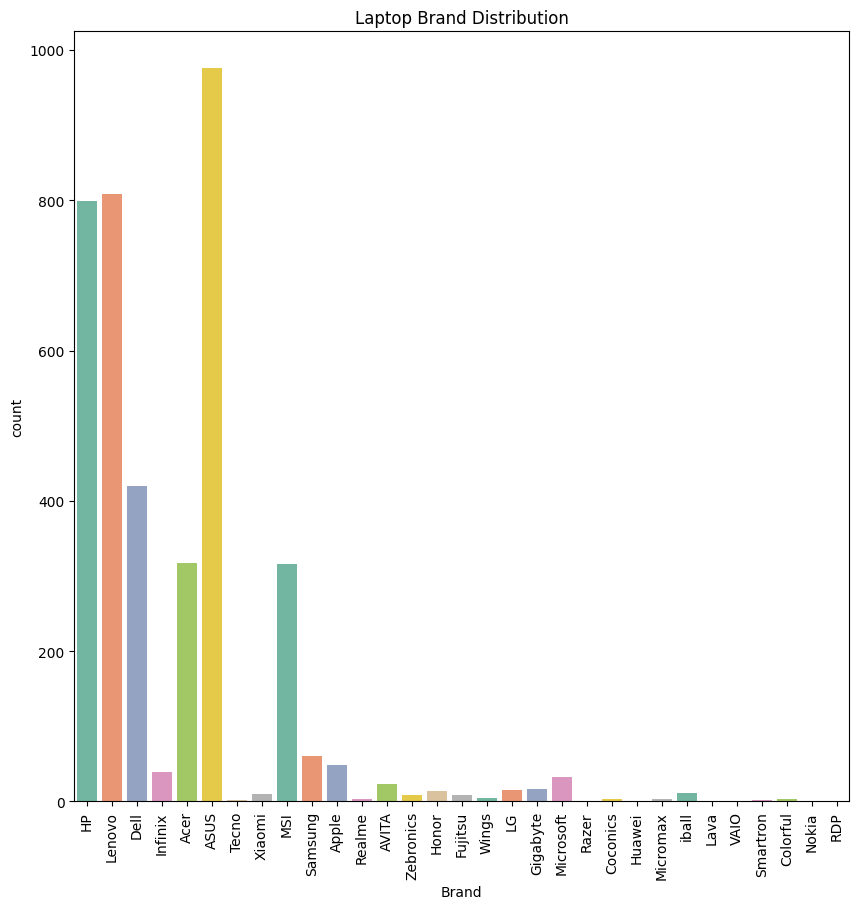

In [146]:
print(f"Number of unique Brands: {df['Brand'].nunique()}\n") 
print(f"Unique Values: {df['Brand'].unique()}\n")
print(f"Value count for each unique Brand type: {df['Brand'].value_counts()}")

plt.figure(figsize=(10,10))
sns.countplot(x='Brand',data=df, palette='Set2')
plt.title("Laptop Brand Distribution")
plt.xticks(rotation=90)
plt.show()

*2. Visualization of Processor Brand*

Number of unique processor brands: 19

Unique Values: ['MediaTek' 'AMD' 'Intel' 'Apple' '2.3' '3.4' 'Qualcomm' '3.3' '1.6' '2.4'
 '3.0' '2.2' '1.7' '2.0' '2.1' '1.8' 'Microsoft' '1.9' '2.6']

Value count for each unique processor brand type: Processor_Brand
Intel        2986
AMD           916
Apple          20
MediaTek        4
1.7             4
2.4             2
3.4             2
2.0             2
2.1             2
3.0             2
Qualcomm        1
3.3             1
1.6             1
2.3             1
2.2             1
1.8             1
Microsoft       1
1.9             1
2.6             1
Name: count, dtype: int64


/tmp/ipykernel_1688/1454627382.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Processor_Brand',data=df, palette='Set2')


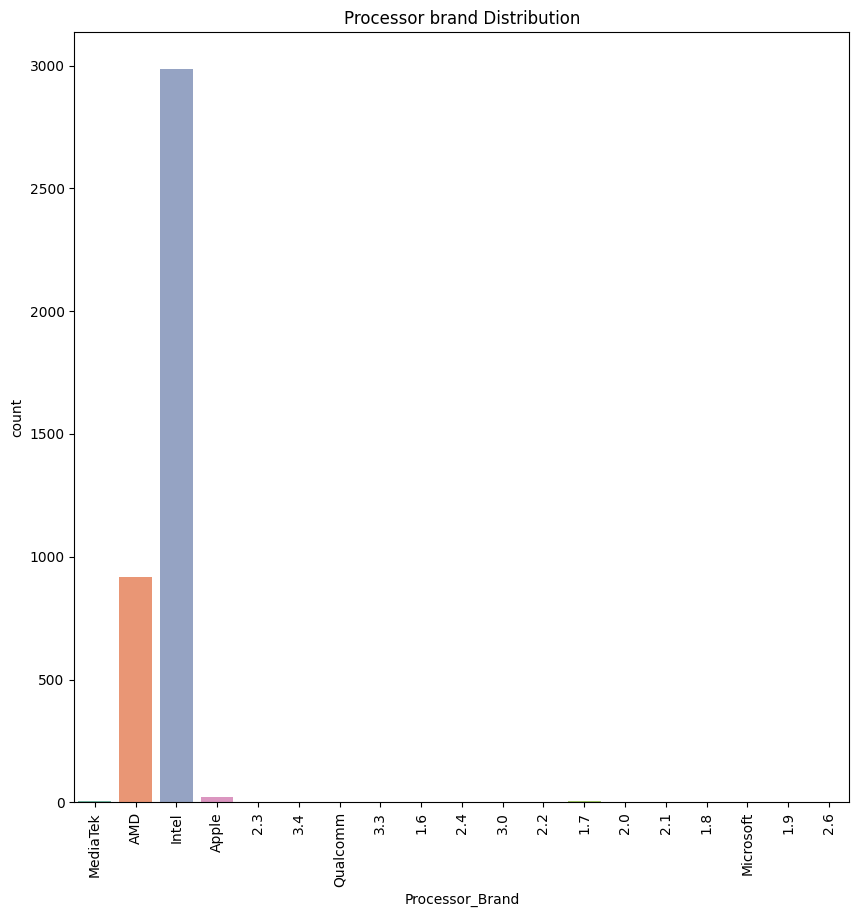

In [147]:
print(f"Number of unique processor brands: {df['Processor_Brand'].nunique()}\n")
print(f"Unique Values: {df['Processor_Brand'].unique()}\n")
print(f"Value count for each unique processor brand type: {df['Processor_Brand'].value_counts()}")

plt.figure(figsize=(10,10))
sns.countplot(x='Processor_Brand',data=df, palette='Set2')
plt.title("Processor brand Distribution")
plt.xticks(rotation=90)
plt.show()

Include both string and numerical values

3. Visualization of RAM

Number of unique RAM sizes: 20

Unique Values: ['4 GB ' '8 GB ' '16 GB ' '8 GB LP' '16 GB LP' '4 GB LP' '32 GB LP'
 '8 GB RAM' '16 GB RAM ' '32 GB ' '16 GB RAM' '18 GB RAM' '32 GB RAM'
 '64 GB ' '12 GB ' '36 GB RAM' '2 GB ' '24 GB ' '6 GB ' '3 GB ']

Value count for each unique RAM sizes: RAM
8 GB          1601
16 GB         1077
4 GB           544
16 GB LP       297
8 GB LP        178
32 GB           88
32 GB LP        48
4 GB LP         36
2 GB            24
16 GB RAM       16
8 GB RAM        14
64 GB            6
12 GB            6
16 GB RAM        5
32 GB RAM        3
3 GB             2
18 GB RAM        1
36 GB RAM        1
24 GB            1
6 GB             1
Name: count, dtype: int64


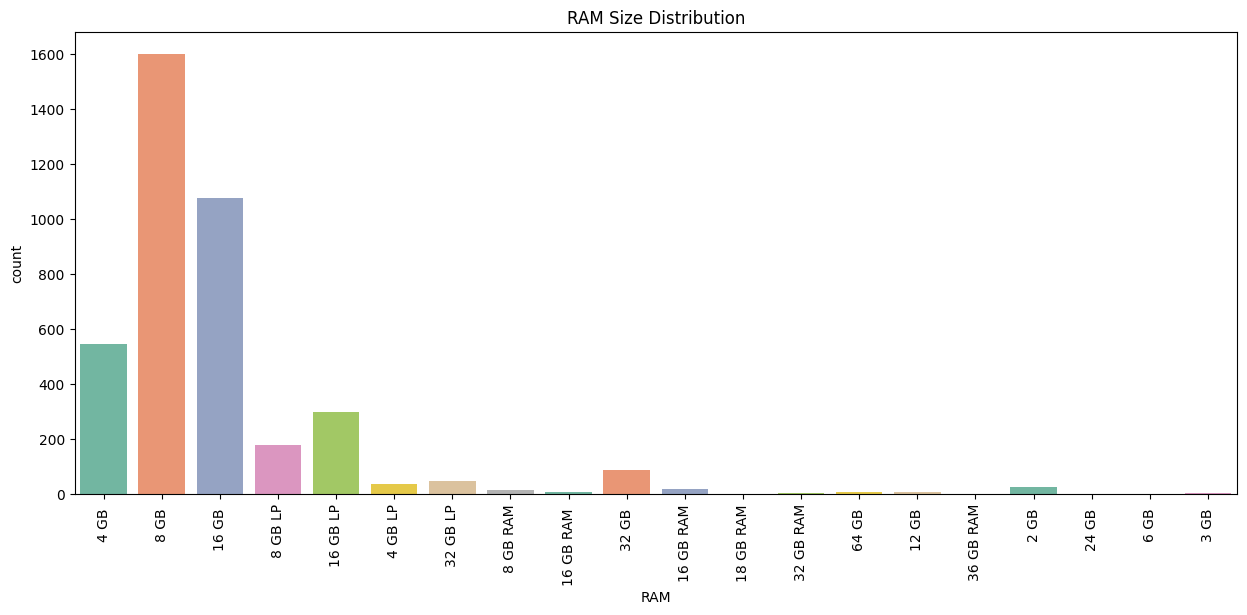

In [148]:
print(f"Number of unique RAM sizes: {df['RAM'].nunique()}\n")
print(f"Unique Values: {df['RAM'].unique()}\n")
print(f"Value count for each unique RAM sizes: {df['RAM'].value_counts()}")


plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='RAM', hue='RAM', palette='Set2')
plt.xticks(rotation=90)
plt.title("RAM Size Distribution")
plt.show()

*3.Visualization of RAM types*

Number of unique RAM types: 19

Unique Values: [' DDR4 RAM' ' DDR4 RAM ' ' DDR5 RAM ' ' LPDDR4X RAM' ' LPDDR5X RAM '
 ' LPDDR5 RAM' ' LPDDR4 RAM' ' DDR5 RAM' ' LPDDR5X RAM' ' LPDDR5 RAM '
 ' LPDDR4X RAM ' ' LPDDR3 RAM' ' RAM' ' RAM ' ' LPDDR4 RAM ' ' DDR3 RAM'
 ' DDR3 RAM ' ' LPDDR3 RAM ' ' DDR2 RAM']

Value count for each unique RAM type: RAM_TYPE
DDR4 RAM        1495
DDR4 RAM        1311
DDR5 RAM         244
DDR5 RAM         144
LPDDR5 RAM       140
LPDDR4X RAM      121
LPDDR5 RAM        97
DDR3 RAM          87
DDR3 RAM          68
LPDDR3 RAM        48
LPDDR5X RAM       42
LPDDR4X RAM       37
LPDDR5X RAM       36
RAM               35
LPDDR4 RAM        28
LPDDR4 RAM         8
RAM                5
LPDDR3 RAM         2
DDR2 RAM           1
Name: count, dtype: int64


/tmp/ipykernel_1688/4131829469.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RAM_TYPE',data=df, palette='Set2')


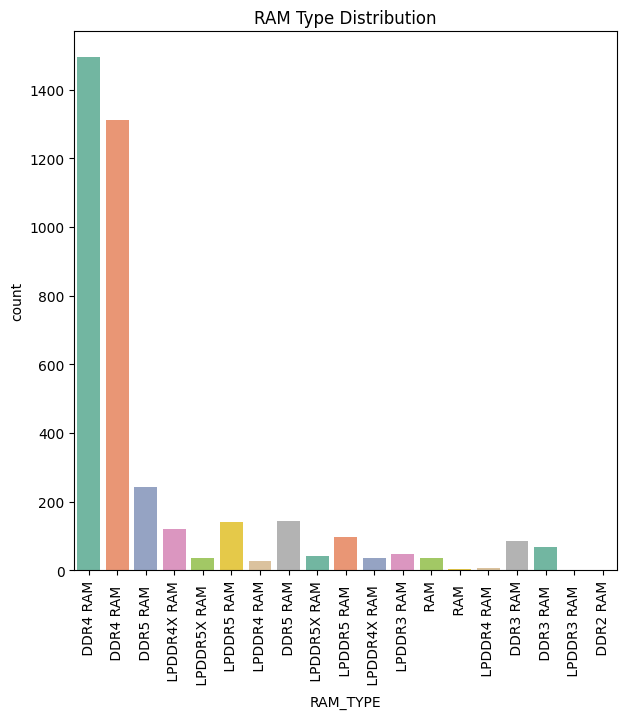

In [155]:
print(f"Number of unique RAM types: {df['RAM_TYPE'].nunique()}\n")
print(f"Unique Values: {df['RAM_TYPE'].unique()}\n")
print(f"Value count for each unique RAM type: {df['RAM_TYPE'].value_counts()}")


plt.figure(figsize=(7,7))
sns.countplot(x='RAM_TYPE',data=df, palette='Set2')
plt.title("RAM Type Distribution")
plt.xticks(rotation=90)
plt.show()

* There is 19 unique values but they are acually not unique .There are some same values unique names with different spaces. so there are only 9 actual unique values.

        DDR4 RAM, DDR3 RAM, DDR5 RAM, DDR2, LPDDR3, LPDDR4, LPDDR5, LPDDR4X, LPDDR5X

* There are some values without RAM type('RAM')
    
   

Visualization Ram Expandable column

Number of unique RAM Expandable sizes: 10

Unique Values: ['Not Expandable' ' 12 GB Expandable' ' 32 GB Expandable'
 ' 8 GB Expandable' ' 16 GB Expandable' ' 4 GB Expandable'
 ' 64 GB Expandable' ' 48 GB Expandable' ' 2 GB Expandable'
 ' 10 GB Expandable']

Value count for each unique RAM expandable sizes: RAM_Expandable
Not Expandable       2141
 16 GB Expandable     752
 32 GB Expandable     535
 8 GB Expandable      185
 64 GB Expandable     158
 12 GB Expandable     157
 4 GB Expandable        9
 48 GB Expandable       9
 2 GB Expandable        2
 10 GB Expandable       1
Name: count, dtype: int64


/tmp/ipykernel_1688/3874031958.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RAM_Expandable',data=df, palette='Set2')


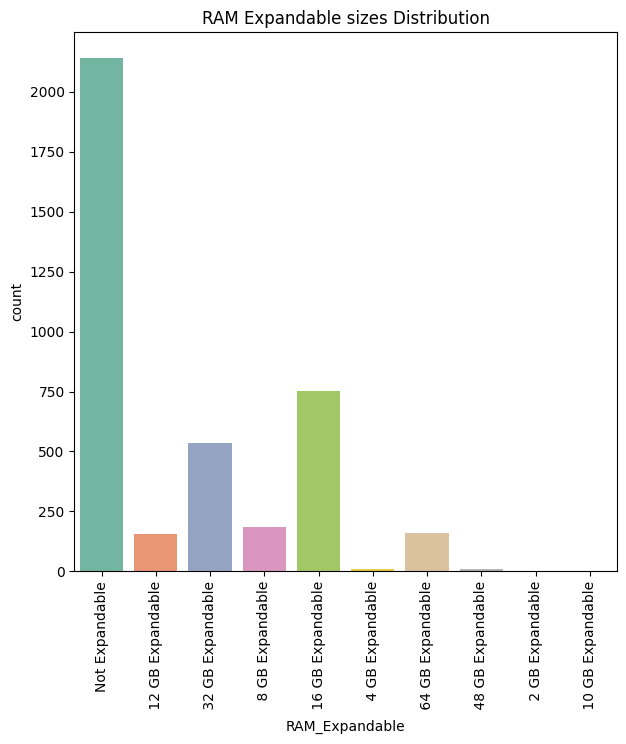

In [150]:
print(f"Number of unique RAM Expandable sizes: {df['RAM_Expandable'].nunique()}\n")
print(f"Unique Values: {df['RAM_Expandable'].unique()}\n")
print(f"Value count for each unique RAM expandable sizes: {df['RAM_Expandable'].value_counts()}")


plt.figure(figsize=(7,7))
sns.countplot(x='RAM_Expandable',data=df, palette='Set2')
plt.xticks(rotation=90)
plt.title("RAM Expandable sizes Distribution")
plt.show()

4. Visualization of Display type

Number of unique Display types: 2

Unique Values: ['LED' 'LCD']

Value count for each unique Display type: Display_type
LCD    2016
LED    1933
Name: count, dtype: int64


/tmp/ipykernel_1688/1368649046.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Display_type',data=df, palette='Set2')


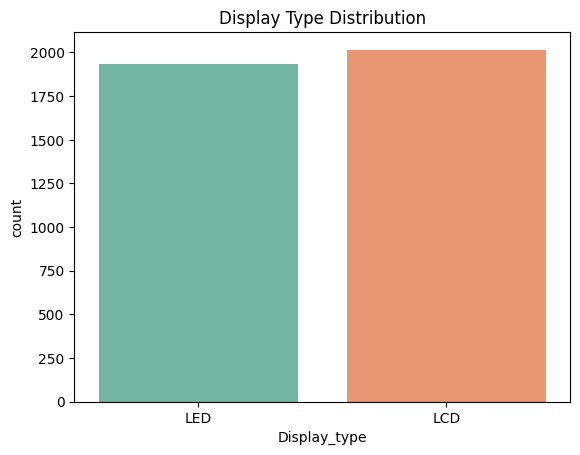

In [151]:
print(f"Number of unique Display types: {df['Display_type'].nunique()}\n")
print(f"Unique Values: {df['Display_type'].unique()}\n")
print(f"Value count for each unique Display type: {df['Display_type'].value_counts()}")

sns.countplot(x='Display_type',data=df, palette='Set2')
plt.title("Display Type Distribution")
plt.show()

Visualization of processor speed

Number of unique Processor speed values: 31

Unique Values: [' 2.0 Ghz Processor' ' 4.0 Ghz Processor' ' 3.3 Ghz Processor'
 ' 4.2 Ghz Processor' ' 1.7 Ghz Processor' '0' ' 2.5 Ghz Processor'
 ' 2.2 Ghz Processor' ' 2.9 Ghz Processor' ' 3.4 Ghz Processor'
 ' 2.6 Ghz Processor' ' 3.0 Ghz Processor' ' 4.7 Ghz Processor'
 ' 3.1 Ghz Processor' ' 2.7 Ghz Processor' ' 2.8 Ghz Processor'
 ' 2.4 Ghz Processor' ' 2.1 Ghz Processor' ' 4.8 Ghz Processor'
 ' 1.2 Ghz Processor' ' 1.0 Ghz Processor' ' 1.8 Ghz Processor'
 ' 1.1 Ghz Processor' ' 2.3 Ghz Processor' ' 1.6 Ghz Processor'
 ' 0.8 Ghz Processor' ' 1.3 Ghz Processor' ' 1.5 Ghz Processor'
 ' 1.9 Ghz Processor' ' 5.5 Ghz Processor' ' 1.4 Ghz Processor']

Value count for each unique Processor speeds: Ghz
 4.2 Ghz Processor    330
 2.4 Ghz Processor    251
 4.7 Ghz Processor    243
 1.6 Ghz Processor    233
0                     220
 2.3 Ghz Processor    210
 3.3 Ghz Processor    196
 4.8 Ghz Processor    182
 2.6 Ghz Processor    177
 2.1 Ghz P

/tmp/ipykernel_1688/867873960.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ghz',data=df, palette='Set2')


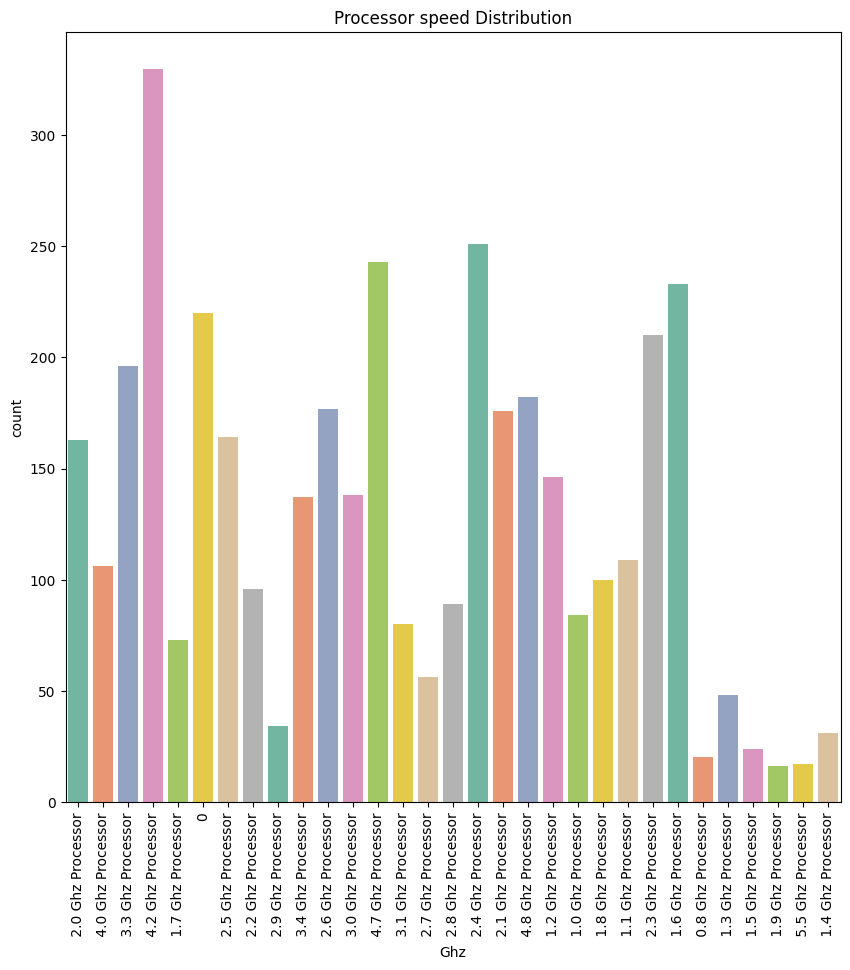

In [156]:
print(f"Number of unique Processor speed values: {df['Ghz'].nunique()}\n")
print(f"Unique Values: {df['Ghz'].unique()}\n")
print(f"Value count for each unique Processor speeds: {df['Ghz'].value_counts()}")

plt.figure(figsize=(10,10))
sns.countplot(x='Ghz',data=df, palette='Set2')
plt.title("Processor speed Distribution")
plt.xticks(rotation=90)
plt.show()

Visualization of GPU

In [159]:
print(f"Number of unique GPUs: {df['GPU'].nunique()}\n")
print(f"Unique Values: {df['GPU'].unique()}\n")
print(f"Value count for each unique GPU s: {df['GPU'].value_counts()}")


Number of unique GPUs: 300

Unique Values: ['Integrated Graphics' 'Radeon' 'GeForce RTX 3050 GPU, 4 GB' 'Iris Xe'
 'UHD' 'UHD 620' 'GeForce RTX 2050 GPU, 4 GB' 'GeForce RTX 4050 GPU, 6 GB'
 'Arc' 'GeForce GTX 1650 GPU, 4 GB' 'UHD 605' 'GeForce RTX 3060 GPU, 6 GB'
 'GeForce GTX 1650 Max Q GPU, 4 GB' 'GeForce RTX 3050 Ti GPU, 4 GB'
 'Integrated' 'Geforce GTX 1650 GPU, 4 GB' 'Radeon Vega 3' 'UHD Graphics'
 'UHD GPU, 128 MB' 'M1' 'HD 6000' 'UHD 600' 'Radeon Vega 6'
 'M2 Integrated' 'HD 620' 'Geforce MX150 GPU, 2 GB' 'Radeon Vega 8'
 'Geforce GTX 1650 Max-Q GPU, 4 GB' 'GeForce GTX 1650 Ti GPU, 4 GB'
 'Radeon RX Vega 10' 'HD 520' 'Radeon RX 5500M GPU, 4 GB'
 'GeForce GTX 3050 GPU, 4 GB' 'Radeon 610M' 'Radeon RX6500M GPU, 4 GB'
 'GeForce GTX 1650 MAX Q GPU, 4 GB' 'GeForce RTX 2050' 'HD 500'
 'Radeon Graphics' 'GeForce RTX 3070 Ti GPU, 8 GB'
 'GeForce GTX 1050 GPU, 4 GB' 'Geforce RTX 3050 GPU, 4 GB' 'M2'
 'Radeon RX 6500M GPU, 4 GB' 'Radeon RX 5600M GPU, 6 GB'
 'GeForce MX450 GPU, 2 GB' 'GeFor

* Hard to visualize beacuse there are 300 unique values

Visualization of GPU Brand

Number of unique GPUs: 11

Unique Values: ['MediaTek' 'AMD' 'NVIDIA' 'Intel' 'Apple' 'Qualcomm' 'NIVIDIA' 'Nvidia'
 'ARM' nan 'Microsoft' 'ATI']

Value count for each unique GPU brandss: GPU_Brand
Intel        1922
NVIDIA       1370
AMD           616
Apple          21
Nvidia          8
MediaTek        3
Qualcomm        1
NIVIDIA         1
ARM             1
Microsoft       1
ATI             1
Name: count, dtype: int64


/tmp/ipykernel_1688/3032397825.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GPU_Brand',data=df, palette='Set2')


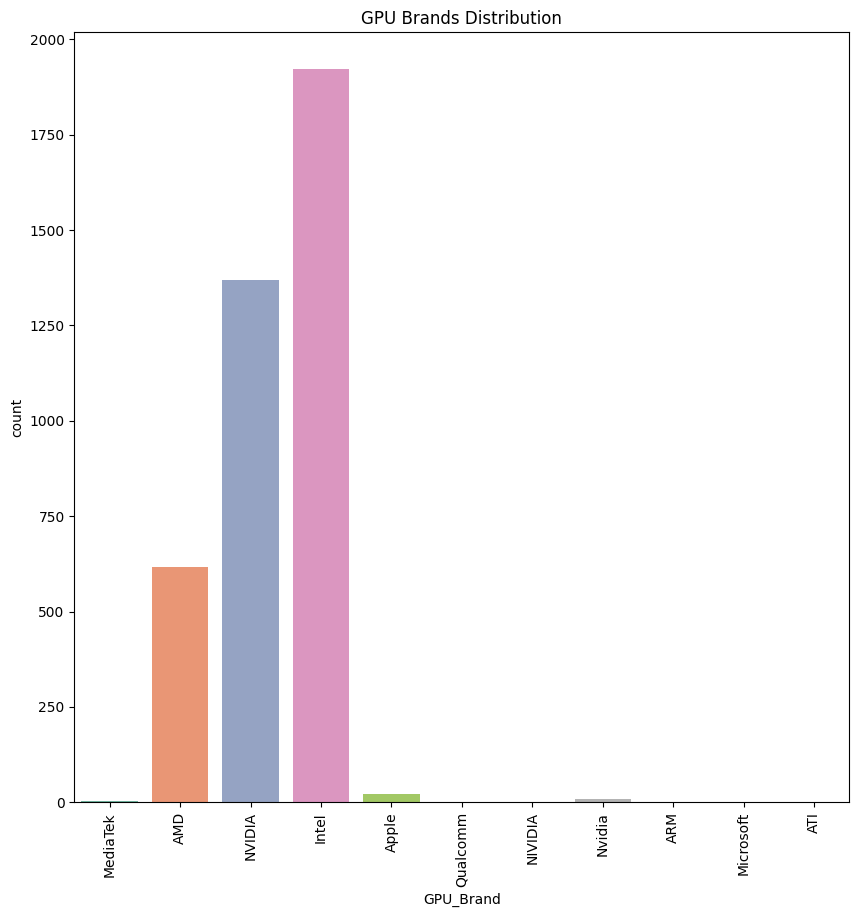

In [162]:
print(f"Number of unique GPUs: {df['GPU_Brand'].nunique()}\n")
print(f"Unique Values: {df['GPU_Brand'].unique()}\n")
print(f"Value count for each unique GPU brandss: {df['GPU_Brand'].value_counts()}")

plt.figure(figsize=(10,10))
sns.countplot(x='GPU_Brand',data=df, palette='Set2')
plt.title("GPU Brands Distribution")
plt.xticks(rotation=90)
plt.show()

In [152]:
df.dtypes


Brand              object
Price               int64
Processor_Name     object
Processor_Brand    object
RAM_Expandable     object
RAM                object
RAM_TYPE           object
Ghz                object
Display_type       object
Display            object
GPU                object
GPU_Brand          object
SSD                object
HDD                object
Adapter            object
Battery_Life       object
dtype: object